In [2]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import logging
LOG_FORMAT = "%(asctime)s [%(levelname)s] %(message)s"
DATE_FORMAT = "%Y-%m-%d %H:%M:%S"
logging.basicConfig(level=logging.INFO, format=LOG_FORMAT, datefmt=DATE_FORMAT)

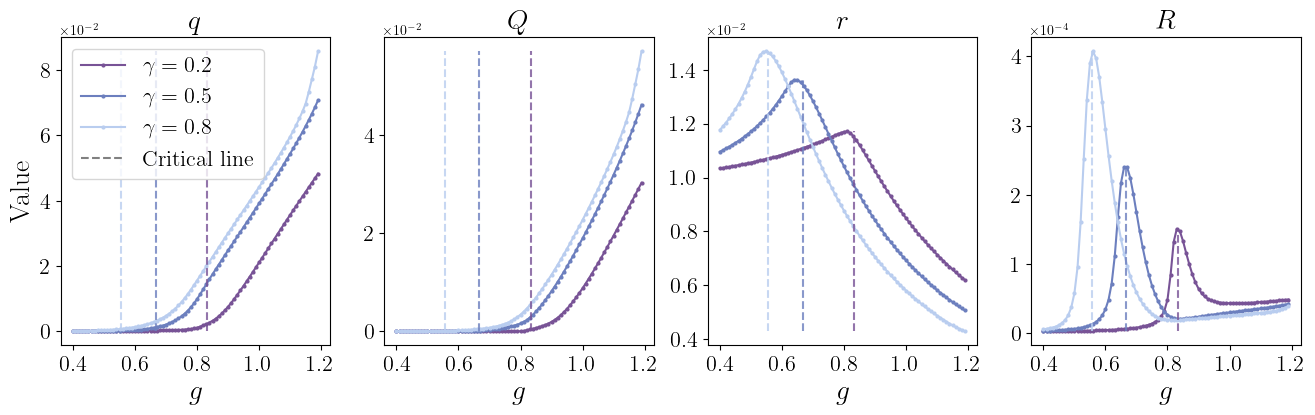

In [13]:
logging.getLogger().setLevel(logging.INFO)
prefixPath = "../../Data/results/2/a1"
beta = 10000.0
eta = 0.0
nonLinearity = 'tanh'
gammas = [0.2, 0.5, 0.8]
gi = [0.4, 0.4, 0.4]
gf = [1.2, 1.2, 1.2]
nonLinearity = 'tanh'
gammas = [0.2, 0.5, 0.8]
colors = ["#785396", "#6C7FBE", "#B9CDEF"]
# colors = ["#4298b5", "#009f4d", "#e4002b"]
indexs = [0, 1, 4, 5]
titles = ["$q$", "$Q$", "$r$", "$R$"]
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
for t in range(4):
    maxValue = 0
    minValue = 100
    for i, gamma in enumerate(gammas):
        record = torch.load(prefixPath + f"/gCurve-beta{beta}-gamma{gamma}-gi{gi[i]}-gf{gf[i]}-eta{eta}-{nonLinearity}.pt")
        gList = torch.tensor(record["gList"])[:record["currentIndex"]+1]
        QList = record["Qs"]

        ax[t].plot(gList, QList[indexs[t]], linewidth=1.5, marker="o", markersize=2, c=colors[i], label="$\\gamma = {}$".format(gammas[i]))
        if t < 2:
            maxValue = max(maxValue, torch.max(QList[indexs[t]]))
        else:
            minValue = min(minValue, torch.min(QList[indexs[t]]))
    
    for i, gamma in enumerate(gammas):
        record = torch.load(prefixPath + f"/gCurve-beta{beta}-gamma{gamma}-gi{gi[i]}-gf{gf[i]}-eta{eta}-{nonLinearity}.pt")
        gList = torch.tensor(record["gList"])[:record["currentIndex"]+1]
        QList = record["Qs"]

        if t < 2:
            ax[t].vlines([1 / (1 + gamma)], 0, maxValue, linestyles="dashed", colors=colors[i], alpha=0.8)
        else:
            ax[t].vlines([1 / (1 + gamma)], minValue, torch.max(QList[indexs[t]]), linestyles="dashed", colors=colors[i], alpha=0.8)
        
    
    ax[t].set_title(titles[t], fontsize=20)
    ax[t].ticklabel_format(style='sci', scilimits=(-1, 2), axis='y')
    ax[t].tick_params(labelsize=16)
    if t == 0:
        ax[t].set_ylabel("Value", fontsize=20)
    ax[t].set_xlabel("$g$", fontsize=20)
    ax[t].set_xticks([0.4, 0.6, 0.8, 1.0, 1.2])
    if t == 0:
        ax[t].plot([], [], c="gray", linestyle="--", label="Critical line")
        ax[t].legend(fontsize=16)
# plt.savefig("../../Data/figures/fig7-orderParameters-2d.pdf", bbox_inches="tight")
plt.show()
plt.close()